In [4]:
import xarray as xr
import os
import math
import numpy as np#
import matplotlib.pyplot as plt
import gsw
import pandas as pd


In [5]:
root_dir=os.path.join('x:/Marphys_Archive','Data','OSNAP','RHADCP','RHADCP_S55_data_JC238','S200044A008_RHADCP_2020')
## inpaths
infile=os.path.join(root_dir,"RHADCP_S55_data_JC238.nc")
ds=xr.open_dataset(infile)
ds

<xarray.Dataset>
Dimensions:         (BIN: 56, TIME: 30863)
Coordinates:
  * BIN             (BIN) int32 1 2 3 4 5 6 7 8 9 ... 48 49 50 51 52 53 54 55 56
  * TIME            (TIME) datetime64[ns] 2020-10-15T11:30:01 ... 2022-07-20T...
Data variables:
    velocity_east   (BIN, TIME) float64 ...
    velocity_north  (BIN, TIME) float64 ...
    velocity_up     (BIN, TIME) float64 ...
    cell_position   (BIN, TIME) float64 ...
    temperature     (TIME) int64 ...
    pressure        (TIME) int64 ...
    heading         (TIME) int64 ...
    pitch           (TIME) int64 ...
    roll            (TIME) int64 ...
Attributes: (12/15)
    principal_investigator:        Stuart Cunningham
    principal_investigator_email:  stuart.cunningham@sams.ac.uk
    principal_investigator_url:    http://www.sams.ac.uk
    institution:                   Scottish Association for Marine Science, SAMS
    contributor_name:              Lewis Drysdale
    contributor_role:              data processing and interpretation
    ...                            ...
    processing_level:              calibrated;good data
    sensor_manufacturer:           Nortek
    sensor_model:                  Signature 55
    sens_orientation:              upward
    sensor_mount:                  mounted_on_seafloor_structure 
    coordsyst:                     East-North-Up

In [7]:
# get 1d array of cell position
cell_array=ds.cell_position[:,1]
cell_array

<xarray.DataArray 'cell_position' (BIN: 56)>
[56 values with dtype=float64]
Coordinates:
  * BIN      (BIN) int32 1 2 3 4 5 6 7 8 9 10 ... 47 48 49 50 51 52 53 54 55 56
    TIME     datetime64[ns] 2020-10-15T12:00:01
Attributes:
    units:        m
    description:  Cell position

In [8]:
# convert to m
height=gsw.z_from_p(ds.pressure, 55)*-1
height

<xarray.DataArray 'pressure' (TIME: 30863)>
array([   0.        ,    0.        ,    0.        , ..., 1064.5326994 ,
        303.01747383,    0.        ])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2020-10-15T11:30:01 ... 2022-07-20T10:30:01

In [11]:
# remove chain, blanking distance
cell_depth=cell_array-10+2-height.median()
cell_depth=cell_depth*-1
cell_depth

<xarray.DataArray (BIN: 56)>
array([1050.63269978, 1030.63269787, 1010.63269787,  990.63269787,
        970.63269787,  950.63269787,  930.6327055 ,  910.6327055 ,
        890.6327055 ,  870.6327055 ,  850.6327055 ,  830.6327055 ,
        810.6327055 ,  790.6327055 ,  770.6327055 ,  750.6327055 ,
        730.6327055 ,  710.6327055 ,  690.6327055 ,  670.6327055 ,
        650.6327055 ,  630.6327055 ,  610.6327055 ,  590.6327055 ,
        570.6327055 ,  550.63267499,  530.63267499,  510.63267499,
        490.63267499,  470.63267499,  450.63267499,  430.63267499,
        410.63267499,  390.63267499,  370.63267499,  350.63267499,
        330.63267499,  310.63267499,  290.63267499,  270.63267499,
        250.63267499,  230.63267499,  210.63267499,  190.63267499,
        170.63267499,  150.63267499,  130.63267499,  110.63267499,
         90.63267499,   70.63267499,   50.63267499,   30.63267499,
         10.63267499,   -9.36732501,  -29.36732501,  -49.36732501])
Coordinates:
  * BIN      (BIN) int32 1 2 3 4 5 6 7 8 9 10 ... 47 48 49 50 51 52 53 54 55 56
    TIME     datetime64[ns] 2020-10-15T12:00:01

In [12]:
# remove surface and above
ds=ds.sel(BIN=slice("0", "53"))
ds

<xarray.Dataset>
Dimensions:         (BIN: 53, TIME: 30863)
Coordinates:
  * BIN             (BIN) int32 1 2 3 4 5 6 7 8 9 ... 45 46 47 48 49 50 51 52 53
  * TIME            (TIME) datetime64[ns] 2020-10-15T11:30:01 ... 2022-07-20T...
Data variables:
    velocity_east   (BIN, TIME) float64 ...
    velocity_north  (BIN, TIME) float64 ...
    velocity_up     (BIN, TIME) float64 ...
    cell_position   (BIN, TIME) float64 ...
    temperature     (TIME) int64 ...
    pressure        (TIME) int64 ...
    heading         (TIME) int64 ...
    pitch           (TIME) int64 ...
    roll            (TIME) int64 ...
Attributes: (12/15)
    principal_investigator:        Stuart Cunningham
    principal_investigator_email:  stuart.cunningham@sams.ac.uk
    principal_investigator_url:    http://www.sams.ac.uk
    institution:                   Scottish Association for Marine Science, SAMS
    contributor_name:              Lewis Drysdale
    contributor_role:              data processing and interpretation
    ...                            ...
    processing_level:              calibrated;good data
    sensor_manufacturer:           Nortek
    sensor_model:                  Signature 55
    sens_orientation:              upward
    sensor_mount:                  mounted_on_seafloor_structure 
    coordsyst:                     East-North-Up

In [13]:
ds=ds.assign_coords(BIN=cell_depth.values[0:53])
ds

<xarray.Dataset>
Dimensions:         (BIN: 53, TIME: 30863)
Coordinates:
  * BIN             (BIN) float64 1.051e+03 1.031e+03 1.011e+03 ... 30.63 10.63
  * TIME            (TIME) datetime64[ns] 2020-10-15T11:30:01 ... 2022-07-20T...
Data variables:
    velocity_east   (BIN, TIME) float64 ...
    velocity_north  (BIN, TIME) float64 ...
    velocity_up     (BIN, TIME) float64 ...
    cell_position   (BIN, TIME) float64 ...
    temperature     (TIME) int64 ...
    pressure        (TIME) int64 ...
    heading         (TIME) int64 ...
    pitch           (TIME) int64 ...
    roll            (TIME) int64 ...
Attributes: (12/15)
    principal_investigator:        Stuart Cunningham
    principal_investigator_email:  stuart.cunningham@sams.ac.uk
    principal_investigator_url:    http://www.sams.ac.uk
    institution:                   Scottish Association for Marine Science, SAMS
    contributor_name:              Lewis Drysdale
    contributor_role:              data processing and interpretation
    ...                            ...
    processing_level:              calibrated;good data
    sensor_manufacturer:           Nortek
    sensor_model:                  Signature 55
    sens_orientation:              upward
    sensor_mount:                  mounted_on_seafloor_structure 
    coordsyst:                     East-North-Up

In [14]:
# sort depth order
ds=ds.sortby('BIN')
ds

<xarray.Dataset>
Dimensions:         (BIN: 53, TIME: 30863)
Coordinates:
  * BIN             (BIN) float64 10.63 30.63 50.63 ... 1.031e+03 1.051e+03
  * TIME            (TIME) datetime64[ns] 2020-10-15T11:30:01 ... 2022-07-20T...
Data variables:
    velocity_east   (BIN, TIME) float64 ...
    velocity_north  (BIN, TIME) float64 ...
    velocity_up     (BIN, TIME) float64 ...
    cell_position   (BIN, TIME) float64 ...
    temperature     (TIME) int64 ...
    pressure        (TIME) int64 ...
    heading         (TIME) int64 ...
    pitch           (TIME) int64 ...
    roll            (TIME) int64 ...
Attributes: (12/15)
    principal_investigator:        Stuart Cunningham
    principal_investigator_email:  stuart.cunningham@sams.ac.uk
    principal_investigator_url:    http://www.sams.ac.uk
    institution:                   Scottish Association for Marine Science, SAMS
    contributor_name:              Lewis Drysdale
    contributor_role:              data processing and interpretation
    ...                            ...
    processing_level:              calibrated;good data
    sensor_manufacturer:           Nortek
    sensor_model:                  Signature 55
    sens_orientation:              upward
    sensor_mount:                  mounted_on_seafloor_structure 
    coordsyst:                     East-North-Up

In [15]:
ds = ds.where(ds['velocity_east'] != -9.) 
ds

<xarray.Dataset>
Dimensions:         (BIN: 53, TIME: 30863)
Coordinates:
  * BIN             (BIN) float64 10.63 30.63 50.63 ... 1.031e+03 1.051e+03
  * TIME            (TIME) datetime64[ns] 2020-10-15T11:30:01 ... 2022-07-20T...
Data variables:
    velocity_east   (BIN, TIME) float64 nan nan nan nan ... 0.02 0.079 0.208 0.0
    velocity_north  (BIN, TIME) float64 nan nan nan nan ... 0.159 -0.043 0.0
    velocity_up     (BIN, TIME) float64 nan nan nan nan ... -0.003 0.003 0.0
    cell_position   (BIN, TIME) float64 nan nan nan nan ... 21.9 21.9 21.9 21.9
    temperature     (TIME, BIN) float64 nan nan nan nan ... 12.0 12.0 12.0 12.0
    pressure        (TIME, BIN) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    heading         (TIME, BIN) float64 nan nan nan nan ... 300.0 300.0 300.0
    pitch           (TIME, BIN) float64 nan nan nan nan ... -15.0 -15.0 -15.0
    roll            (TIME, BIN) float64 nan nan nan nan ... -77.0 -77.0 -77.0
Attributes: (12/15)
    principal_investigator:        Stuart Cunningham
    principal_investigator_email:  stuart.cunningham@sams.ac.uk
    principal_investigator_url:    http://www.sams.ac.uk
    institution:                   Scottish Association for Marine Science, SAMS
    contributor_name:              Lewis Drysdale
    contributor_role:              data processing and interpretation
    ...                            ...
    processing_level:              calibrated;good data
    sensor_manufacturer:           Nortek
    sensor_model:                  Signature 55
    sens_orientation:              upward
    sensor_mount:                  mounted_on_seafloor_structure 
    coordsyst:                     East-North-Up

In [16]:
z_array=np.arange(0, 1060, 20, dtype=int).astype(np.float32)
ds=ds.interp(BIN=z_array)
ds

<xarray.Dataset>
Dimensions:         (BIN: 53, TIME: 30863)
Coordinates:
  * TIME            (TIME) datetime64[ns] 2020-10-15T11:30:01 ... 2022-07-20T...
  * BIN             (BIN) float32 0.0 20.0 40.0 60.0 ... 1e+03 1.02e+03 1.04e+03
Data variables:
    velocity_east   (BIN, TIME) float64 nan nan nan nan ... 0.06092 0.1559 0.0
    velocity_north  (BIN, TIME) float64 nan nan nan nan ... 0.1404 -0.043 0.0
    velocity_up     (BIN, TIME) float64 nan nan nan nan ... -0.003 0.01523 0.0
    cell_position   (BIN, TIME) float64 nan nan nan nan ... 32.53 32.53 32.53
    temperature     (TIME, BIN) float64 nan nan nan nan ... 12.0 12.0 12.0 12.0
    pressure        (TIME, BIN) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    heading         (TIME, BIN) float64 nan nan nan nan ... 300.0 300.0 300.0
    pitch           (TIME, BIN) float64 nan nan nan nan ... -15.0 -15.0 -15.0
    roll            (TIME, BIN) float64 nan nan nan nan ... -77.0 -77.0 -77.0
Attributes: (12/15)
    principal_investigator:        Stuart Cunningham
    principal_investigator_email:  stuart.cunningham@sams.ac.uk
    principal_investigator_url:    http://www.sams.ac.uk
    institution:                   Scottish Association for Marine Science, SAMS
    contributor_name:              Lewis Drysdale
    contributor_role:              data processing and interpretation
    ...                            ...
    processing_level:              calibrated;good data
    sensor_manufacturer:           Nortek
    sensor_model:                  Signature 55
    sens_orientation:              upward
    sensor_mount:                  mounted_on_seafloor_structure 
    coordsyst:                     East-North-Up

Text(0.5, 1.0, 'velocity_east')

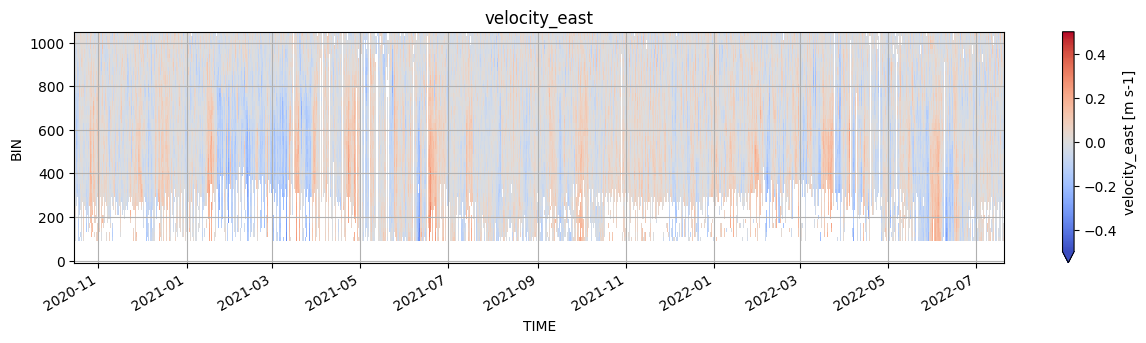

In [17]:
ds.velocity_east.where(ds.velocity_east != -9).plot(figsize=(15,3),cmap='coolwarm',vmin=-0.5, vmax=0.5)
plt.grid()
plt.title('velocity_east')

In [ ]:
strttime= ds.TIME.values[0]
endtime= ds.TIME.values[-1]

timeint = (pd.DataFrame(columns=['NULL'],
              index=pd.date_range(strttime, endtime,
                                  freq='2H'))
   # .between_time('07:00','21:00')
   .index.strftime('%Y-%m-%dT%H:%M:%S.%f')
   .tolist())
da=ds.interp(TIME=timeint)
da=ds.interpolate_na(dim="TIME", method="linear")

In [ ]:
da.velocity_east.plot(figsize=(15,3),cmap='coolwarm',vmin=-0.5, vmax=0.5)
plt.grid()
plt.title('velocity_east')

In [ ]:
# magnitude
magnitude=np.sqrt(np.square(ds.velocity_north.values),np.square(ds.velocity_east.values))

# direction
vTan = np.arctan2(ds.velocity_north.values,ds.velocity_east.values)
heading=np.rad2deg(vTan)


In [ ]:
CD

In [ ]:
plt.plot(CD[45,:])

In [ ]:
arr = np.where(magnitude==9, np.nan, magnitude)

In [ ]:
pressure=ds.pressure
cell_depth.

In [ ]:
x=ds.TIME.values
y=ds.BIN.values
z=magnitude

plt.contourf([x,y],z)

In [ ]:
vAtan = math.atan(vTan)
# atan returns the angle in radians, so convert to degrees
print('inverse-tan = ' + str(math.degrees(vAtan)))